<Figure size 1200x600 with 0 Axes>

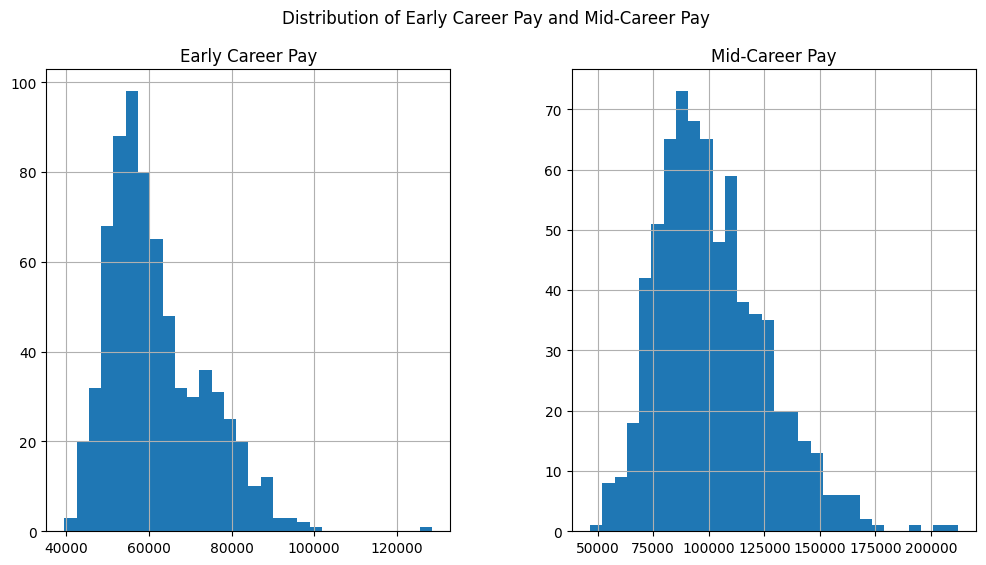

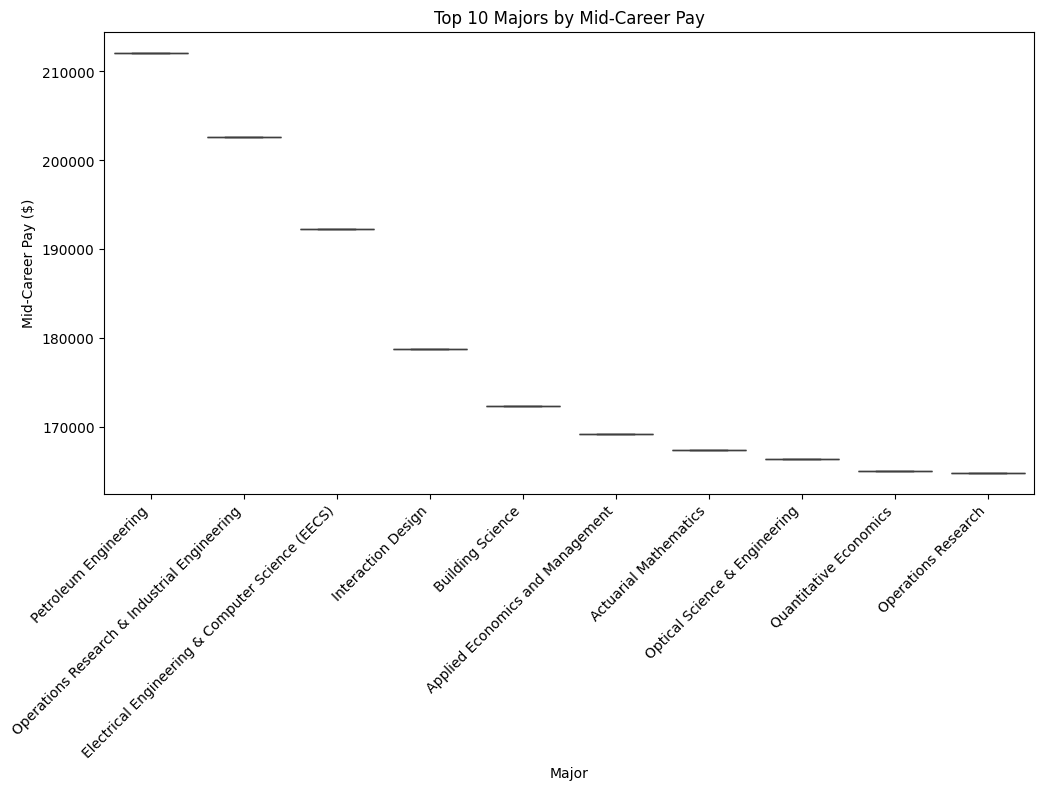

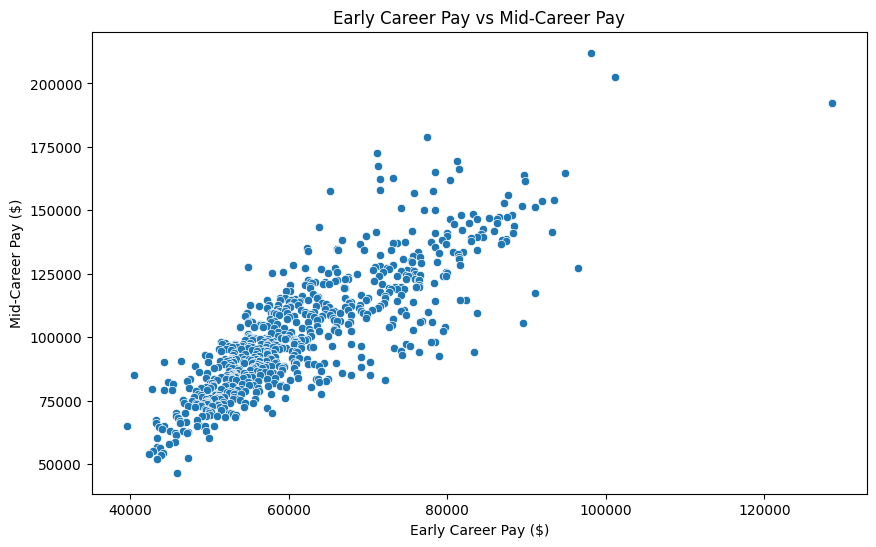

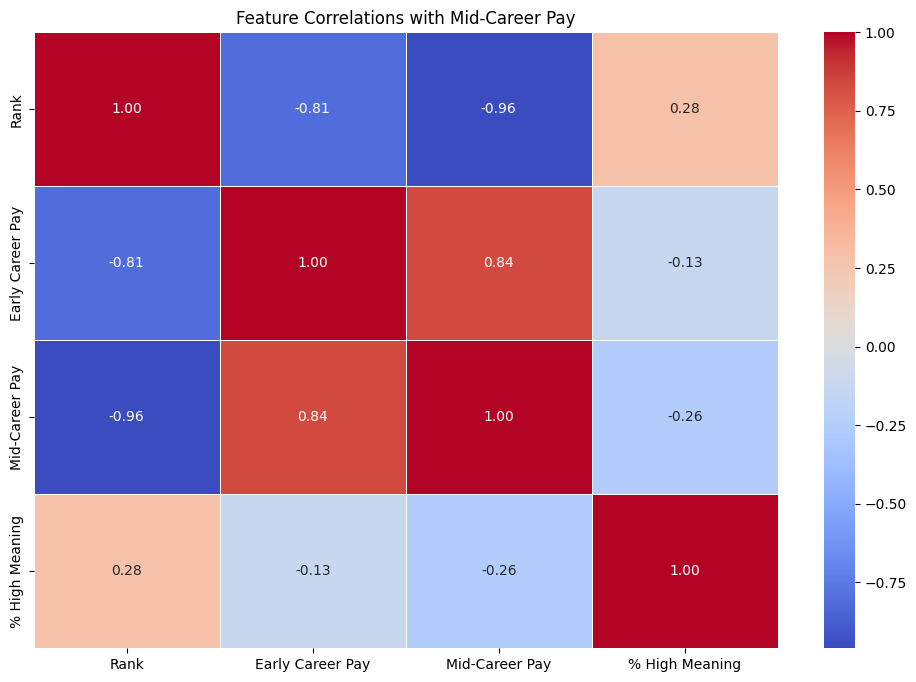

✅ Data visualization complete!


In [2]:
# 📌 Post-College Salary Prediction: Data Exploration & Visualization

# **Author:** Kersha Broussard
# **Dataset:** Post-College Salaries (Kaggle)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
csv_path = r"C:\Users\kbrou\Downloads\post_college_salaries\final-post-college-salaries.csv"
df = pd.read_csv(csv_path)

# Data Cleaning
# Convert salary columns to numeric (remove "$" and ",")
df["Early Career Pay"] = df["Early Career Pay"].replace('[\$,]', '', regex=True).astype(float)
df["Mid-Career Pay"] = df["Mid-Career Pay"].replace('[\$,]', '', regex=True).astype(float)

# Convert "% High Meaning" to numeric
df["% High Meaning"] = df["% High Meaning"].str.replace('%', '', regex=True)
df["% High Meaning"] = pd.to_numeric(df["% High Meaning"], errors="coerce")

# Drop missing values
df.dropna(inplace=True)

# **1. Histograms for Feature Distributions**
plt.figure(figsize=(12, 6))
df[["Early Career Pay", "Mid-Career Pay"]].hist(bins=30, figsize=(12, 6))
plt.suptitle("Distribution of Early Career Pay and Mid-Career Pay")
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
# ** 2 Boxplot for Mid-Career Pay by Major**
# Get the top 10 majors with the highest Mid-Career Pay
top_majors = df.groupby("Major")["Mid-Career Pay"].median().nlargest(10).index
df_top = df[df["Major"].isin(top_majors)]

# Create a boxplot for the top 10 majors
plt.figure(figsize=(12, 6))
sns.boxplot(y=df_top["Mid-Career Pay"], x=df_top["Major"], data=df_top)
plt.xticks(rotation=45, ha="right")  # Rotate and align labels for better readability
plt.title("Top 10 Majors by Mid-Career Pay")
plt.xlabel("Major")
plt.ylabel("Mid-Career Pay ($)")
plt.show()



# **3. Scatterplot: Early vs. Mid-Career Pay**
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Early Career Pay"], y=df["Mid-Career Pay"])
plt.title("Early Career Pay vs Mid-Career Pay")
plt.xlabel("Early Career Pay ($)")
plt.ylabel("Mid-Career Pay ($)")
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation analysis
df_numeric = df.select_dtypes(include=[np.number])

# Plot the heatmap with only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlations with Mid-Career Pay")
plt.show()


# Save the processed dataset for future modeling
df.to_csv("processed_post_college_salaries.csv", index=False)

print("✅ Data visualization complete!")